In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from math import *
import seaborn as sns
import pandas as pd

In [284]:
def strassen_cost_new(n):
    
    if n==1:
        return 1
    
    n_strassen=n
    if n%2!=0:
        n_strassen=1+n
        
    return min(f(n),n**2/4*18+7*strassen_cost_new(n_strassen/2))

def f(n):

    return 2*n**3-n**2



99997.0

In [286]:
n = []
normal_operations = []
strassen_operations = []
for i in range(1,1000):
    normal_operations.append(f(i))
    strassen_operations.append(strassen_cost_new(i))
    if strassen_operations[-1]<normal_operations[-1]:
        print('Strassen beats normal',i)

Strassen beats normal 16
Strassen beats normal 18
Strassen beats normal 20
Strassen beats normal 22
Strassen beats normal 24
Strassen beats normal 26
Strassen beats normal 28
Strassen beats normal 30
Strassen beats normal 32
Strassen beats normal 34
Strassen beats normal 35
Strassen beats normal 36
Strassen beats normal 37
Strassen beats normal 38
Strassen beats normal 39
Strassen beats normal 40
Strassen beats normal 41
Strassen beats normal 42
Strassen beats normal 43
Strassen beats normal 44
Strassen beats normal 45
Strassen beats normal 46
Strassen beats normal 47
Strassen beats normal 48
Strassen beats normal 49
Strassen beats normal 50
Strassen beats normal 51
Strassen beats normal 52
Strassen beats normal 53
Strassen beats normal 54
Strassen beats normal 55
Strassen beats normal 56
Strassen beats normal 57
Strassen beats normal 58
Strassen beats normal 59
Strassen beats normal 60
Strassen beats normal 61
Strassen beats normal 62
Strassen beats normal 63
Strassen beats normal 64


Strassen beats normal 869
Strassen beats normal 870
Strassen beats normal 871
Strassen beats normal 872
Strassen beats normal 873
Strassen beats normal 874
Strassen beats normal 875
Strassen beats normal 876
Strassen beats normal 877
Strassen beats normal 878
Strassen beats normal 879
Strassen beats normal 880
Strassen beats normal 881
Strassen beats normal 882
Strassen beats normal 883
Strassen beats normal 884
Strassen beats normal 885
Strassen beats normal 886
Strassen beats normal 887
Strassen beats normal 888
Strassen beats normal 889
Strassen beats normal 890
Strassen beats normal 891
Strassen beats normal 892
Strassen beats normal 893
Strassen beats normal 894
Strassen beats normal 895
Strassen beats normal 896
Strassen beats normal 897
Strassen beats normal 898
Strassen beats normal 899
Strassen beats normal 900
Strassen beats normal 901
Strassen beats normal 902
Strassen beats normal 903
Strassen beats normal 904
Strassen beats normal 905
Strassen beats normal 906
Strassen bea

Text(0, 0.5, 'operations')

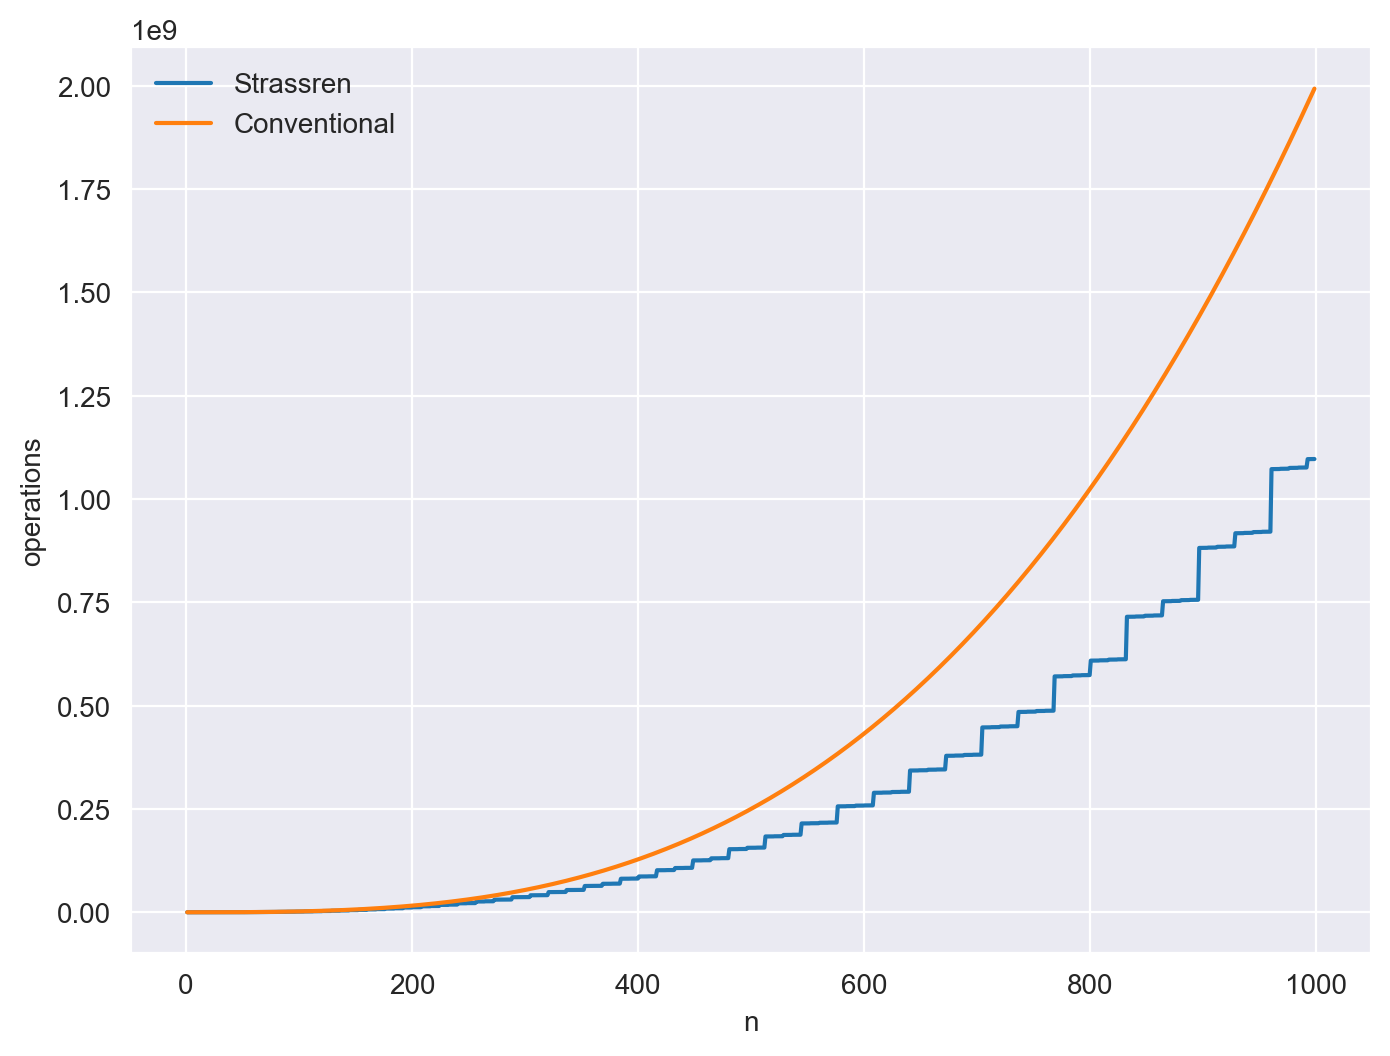

In [302]:
sns.set_style("darkgrid")
plt.figure(figsize=(8,6),dpi=200)
plt.plot(range(1,1000),strassen_operations,label='Strassren')
plt.plot(range(1,1000),normal_operations,label='Conventional')
plt.legend(frameon=False)
plt.xlabel("n")
plt.ylabel("operations")
#plt.xlim(0,1000)

(0.0, 347500.0)

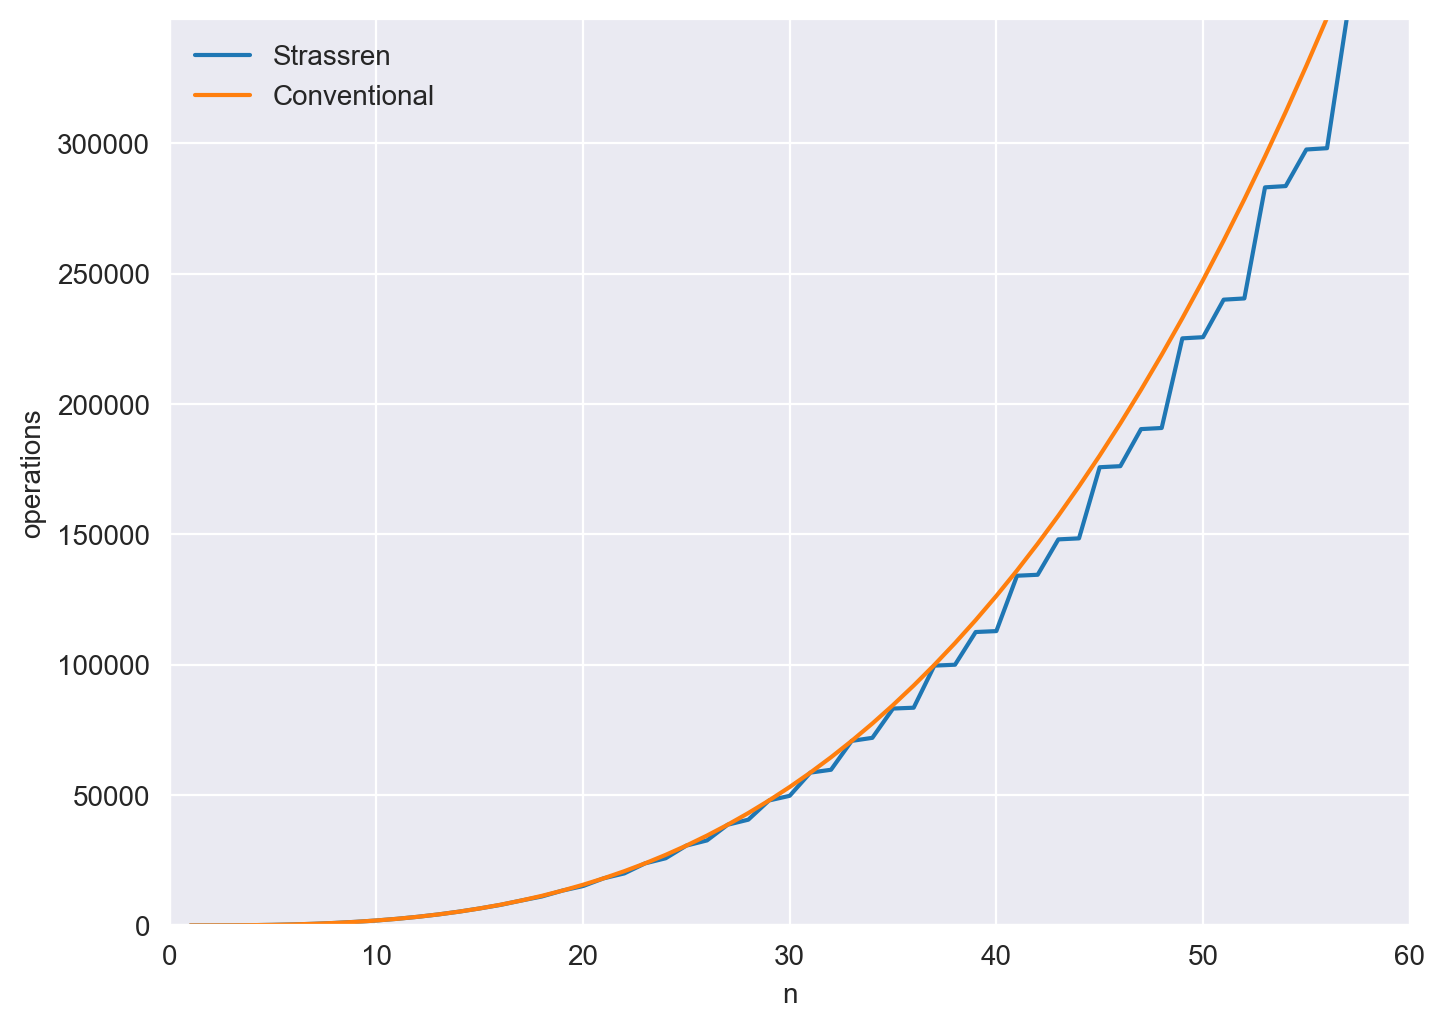

In [303]:
plt.figure(figsize=(8,6),dpi=200)
plt.plot(range(1,1000),strassen_operations,label='Strassren')
plt.plot(range(1,1000),normal_operations,label='Conventional')
plt.legend(frameon=False)
plt.xlabel("n")
plt.ylabel("operations")
plt.xlim(0,60)
plt.ylim(0,347500)

In [3]:
def strassen2(left,right,flag=0):

    n = len(left)
    
    if n==1:
        return left*right
    
    padded=False
    
    if n%2!=0:
        padded=True
        original_n=len(left)
        n = n+1
        left = np.pad(left,((0,1),(0,1)))
        right = np.pad(right,((0,1),(0,1)))


    mid = int(n/2)
    A=left[0:mid,0:mid]
    B=left[0:mid,mid::]
    C=left[mid::,0:mid]
    D=left[mid::,mid::]

    E=right[0:mid,0:mid]
    F=right[0:mid,mid::]
    G=right[mid::,0:mid]
    H=right[mid::,mid::]
    if flag:
        print("A",A)
        print("B",B)
        print("C",C)
        print("D",D)

        print("E",E)
        print("F",F)
        print("G",G)
        print("H",H)
    p1=strassen2(A,F-H)
    p2=strassen2(A+B,H)
    p3=strassen2(C+D,E)
    p4=strassen2(D,G-E)
    p5=strassen2(A+D,E+H)
    p6=strassen2(B-D,G+H)
    p7=strassen2(A-C,E+F)

    lefttop = p5+p4-p2+p6
    righttop = p1+p2
    leftbottom = p3+p4
    rightbottom = p5+p1-p3-p7


    left = np.concatenate((lefttop,leftbottom),axis=0)
    right = np.concatenate((righttop,rightbottom),axis=0)
    if padded==True:
        return np.concatenate((left,right),axis=1)[0:original_n,0:original_n]
    else:
        return np.concatenate((left,right),axis=1)
        

# Analysis

In [66]:
def find_beat_point(df):
    mat_mul_avg = np.mean(df['mat_mul'])
    first_beat = df[df['strassen']<df['mat_mul']].iloc[0]
    return first_beat

In [90]:
n1000 = pd.read_csv('C++CODE/n_1000.txt')
n1100 = pd.read_csv('C++CODE/n_1100.txt')
n1200 = pd.read_csv('C++CODE/n_1200.txt')

even_array = [n1000,n1100,n1200]
for i in range(len(even_array)):
    a = find_beat_point(even_array[i])
    print(a['n'],a['n0'],a['strassen'],a['mat_mul'])

1000.0 32.0 0.62 0.75
1100.0 19.0 1.12 1.19
1200.0 21.0 1.31 1.38


In [97]:
n1100.iloc[35-15]

n           1100.00
n0            35.00
strassen       0.81
mat_mul        1.38
Name: 20, dtype: float64

In [ ]:
n1200.iloc[37-15]

In [92]:
n1001 = pd.read_csv('C++CODE/n_1001.txt')
n1101 = pd.read_csv('C++CODE/n_1101.txt')
n1201 = pd.read_csv('C++CODE/n_1201.txt')

even_array = [n1001,n1101,n1201]
for i in range(len(even_array)):
    a = find_beat_point(even_array[i])
    print(a['n'],a['n0'],a['strassen'],a['mat_mul'])

1001.0 16.0 0.81 0.94
1101.0 18.0 1.25 1.31
1201.0 19.0 1.38 1.94


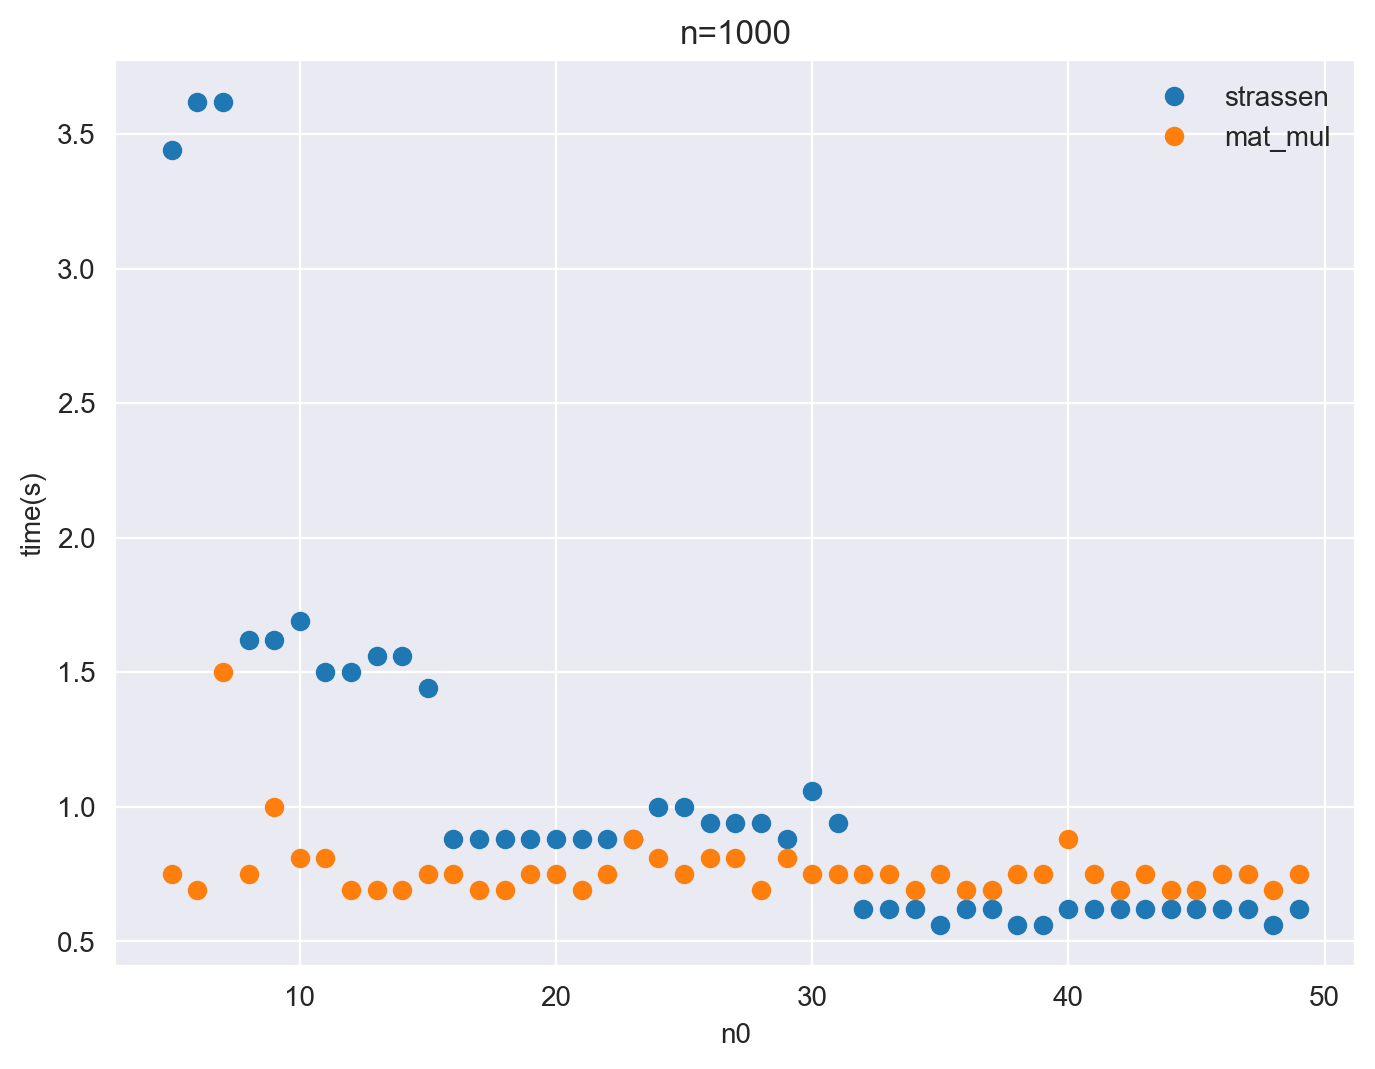

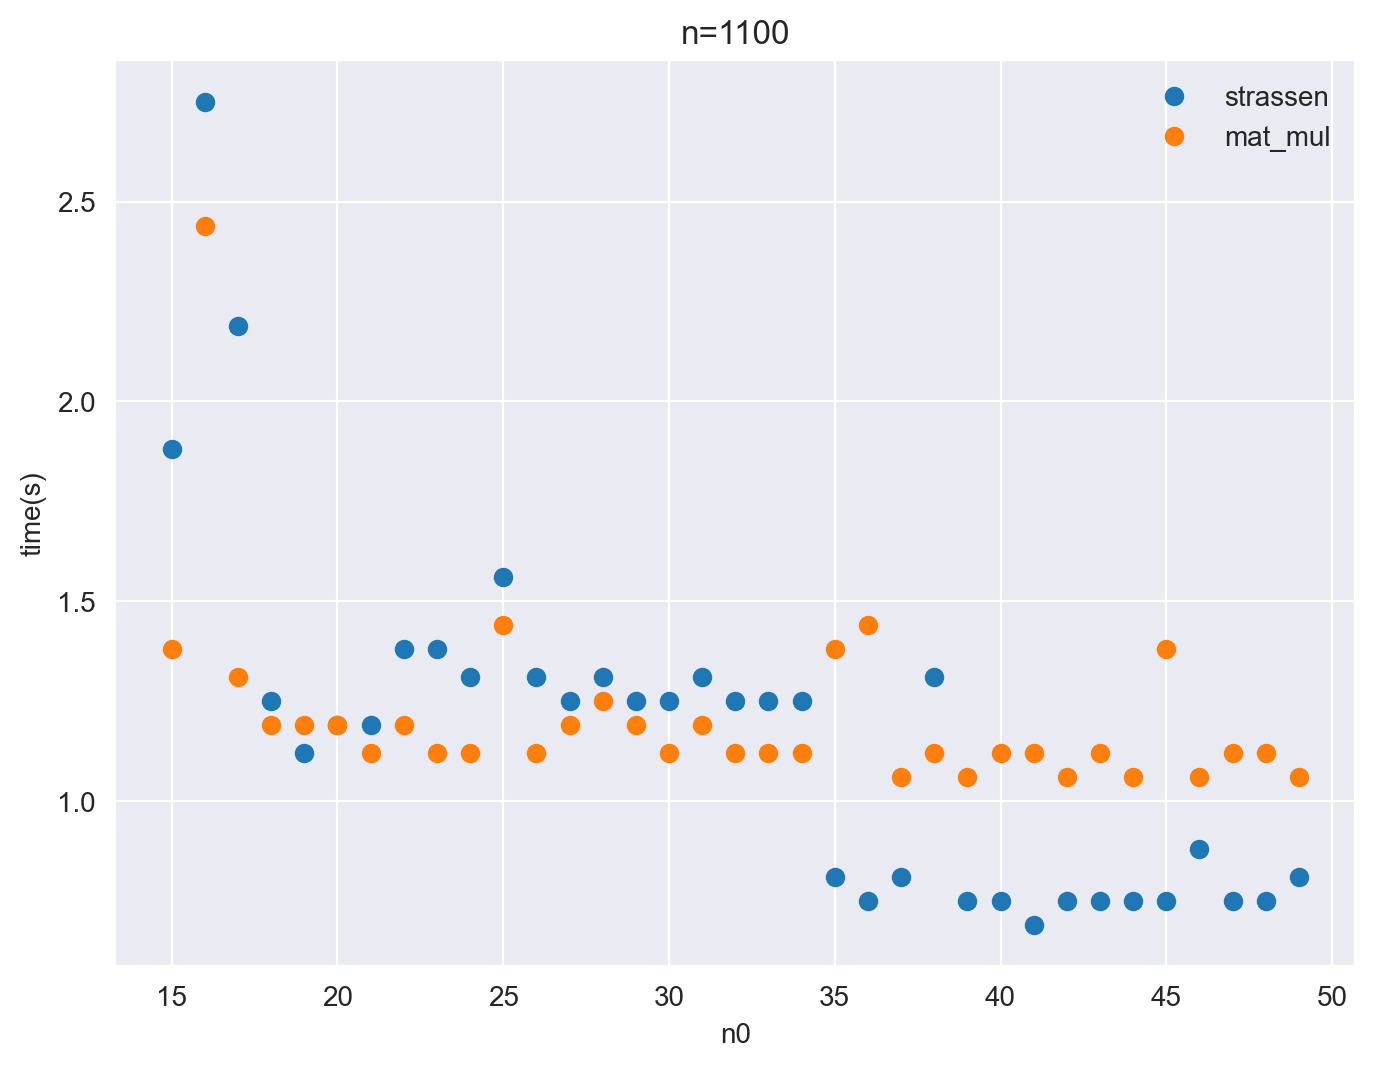

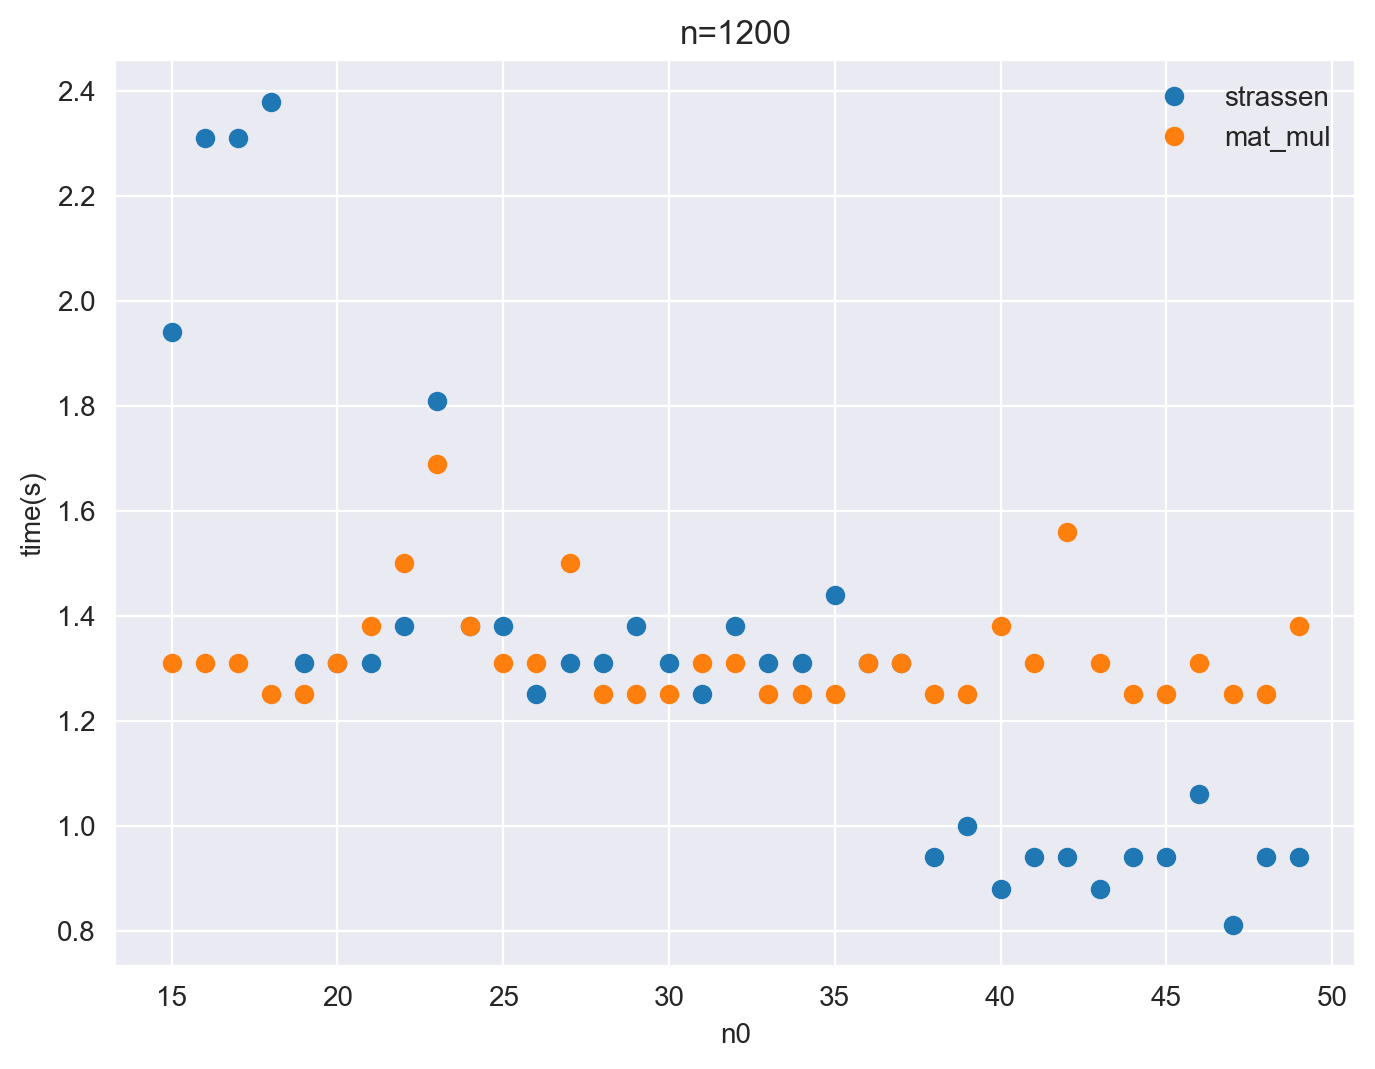

In [106]:
sns.set_style("darkgrid")
def create_plot(df,title,mean=True):
    plt.figure(figsize=(8,6),dpi=200)
    plt.plot(df['n0'],df['strassen'],'o',label='strassen')
    if mean:
        plt.plot(df['n0'],[np.mean(df['mat_mul'])]*len(df),'o',label='mat_mul')
    else:
        plt.plot(df['n0'],(df['mat_mul']),'o',label='mat_mul')

    plt.xlabel('n0')
    plt.ylabel('time(s)')
    plt.title(title)
    plt.legend(frameon=False)
    plt.show()

create_plot(n1000,"n=1000",mean=False)
create_plot(n1100,"n=1100",mean=False)
create_plot(n1200,"n=1200",mean=False)

In [110]:
print(n1000[n1000['n0']==32])
print(n1100[n1100['n0']==39])
print(n1200[n1200['n0']==36])

       n  n0  strassen  mat_mul
27  1000  32      0.62     0.75
       n  n0  strassen  mat_mul
24  1100  39      0.75     1.06
       n  n0  strassen  mat_mul
21  1200  36      1.31     1.31


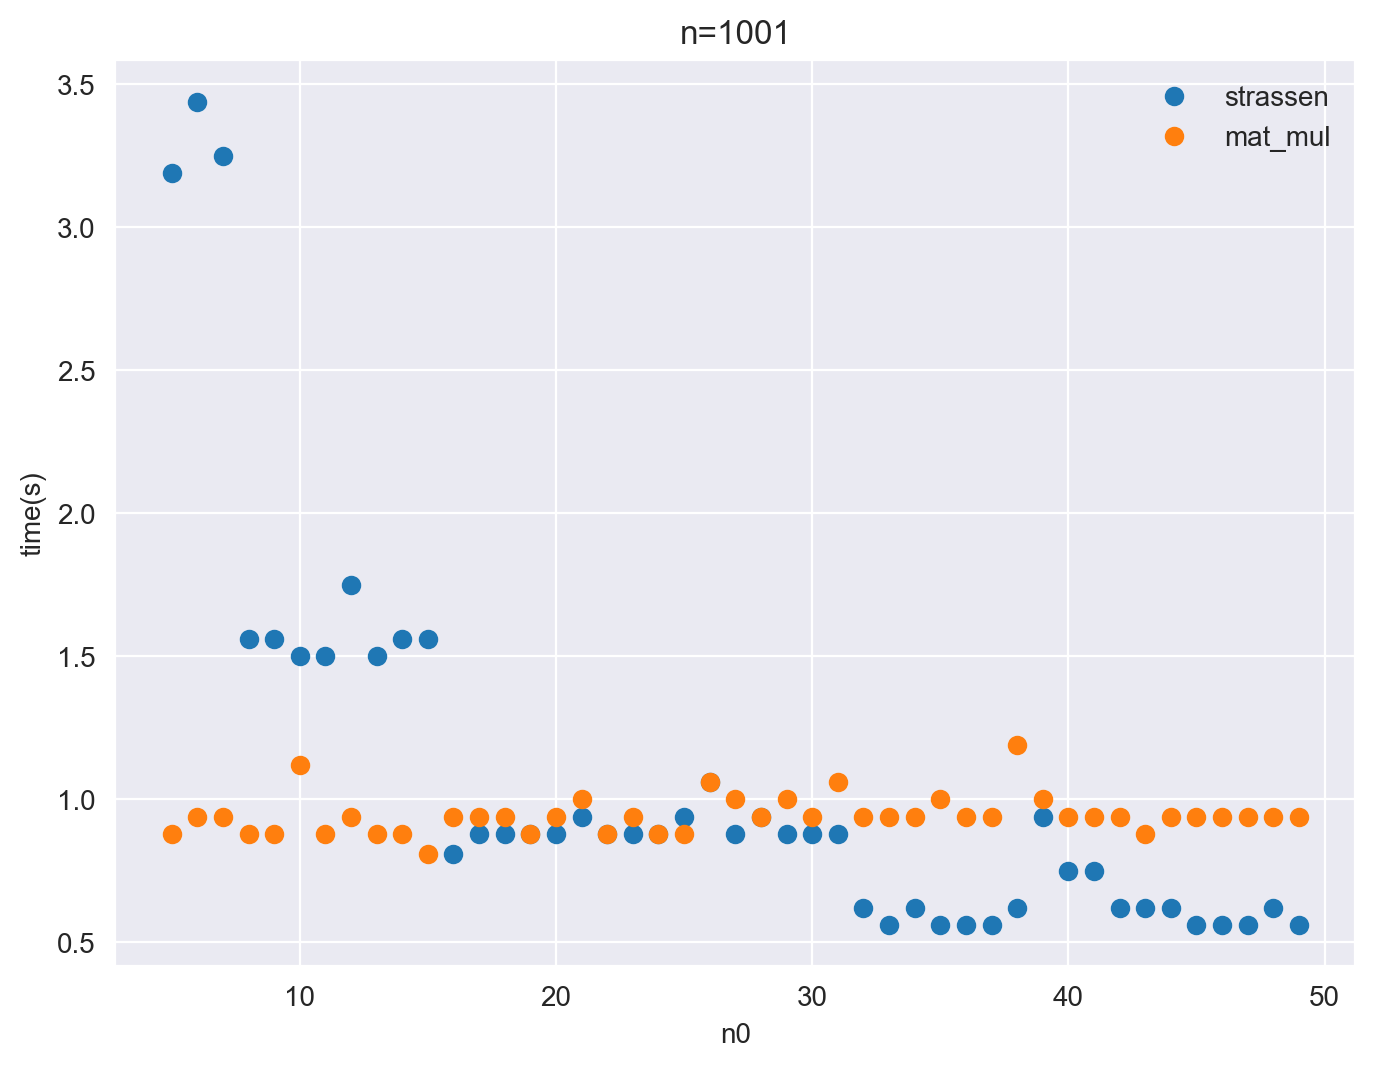

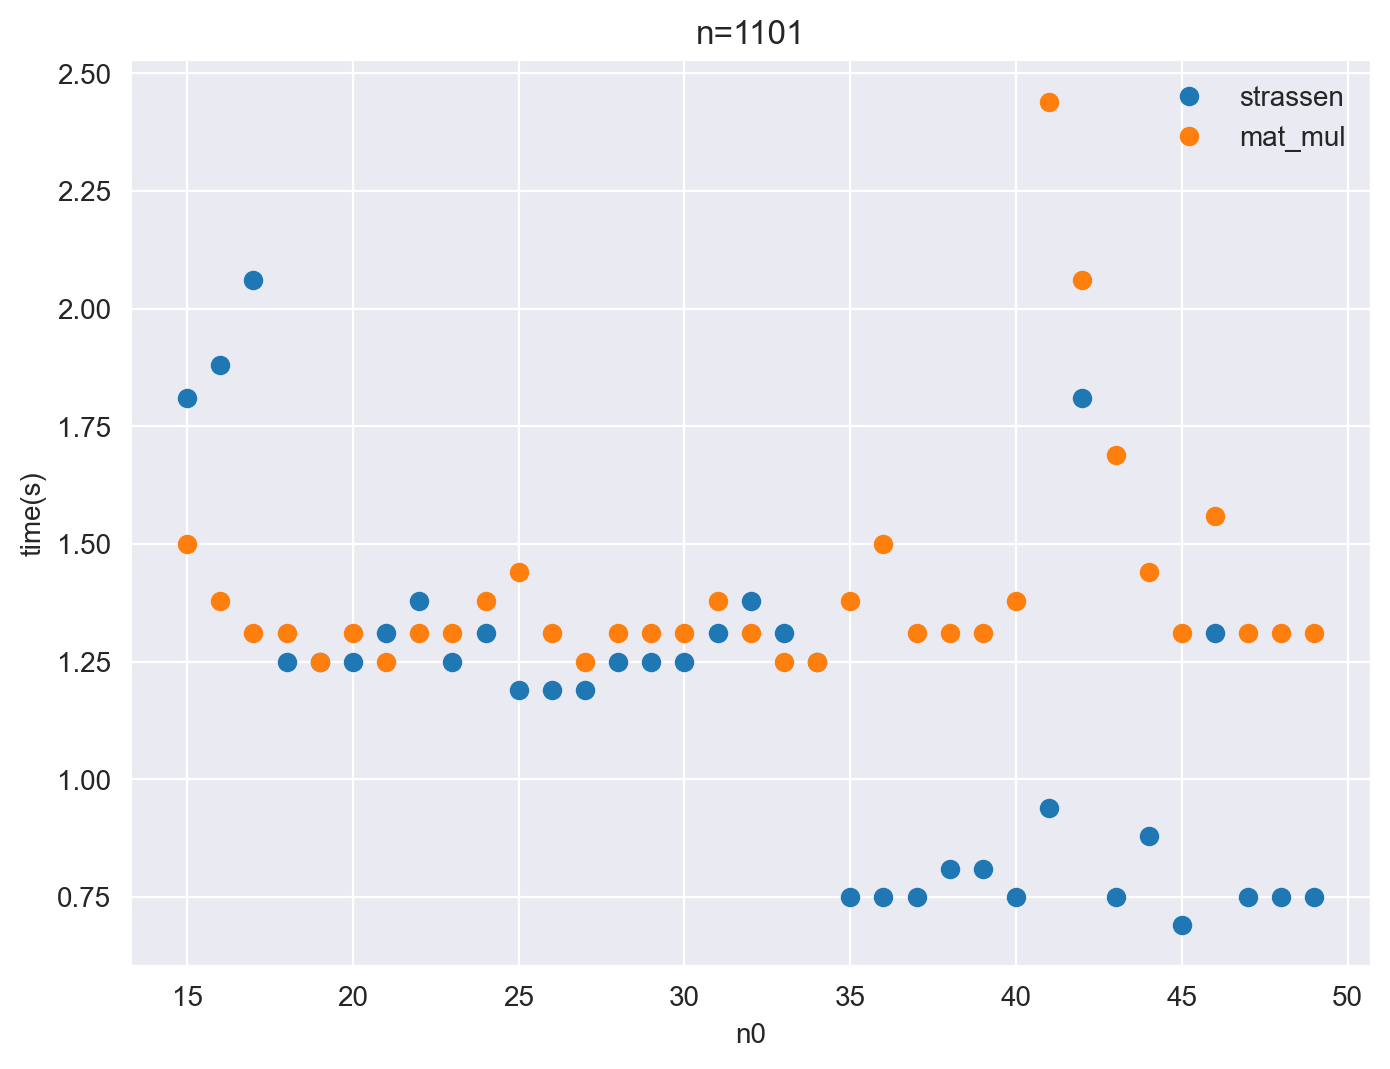

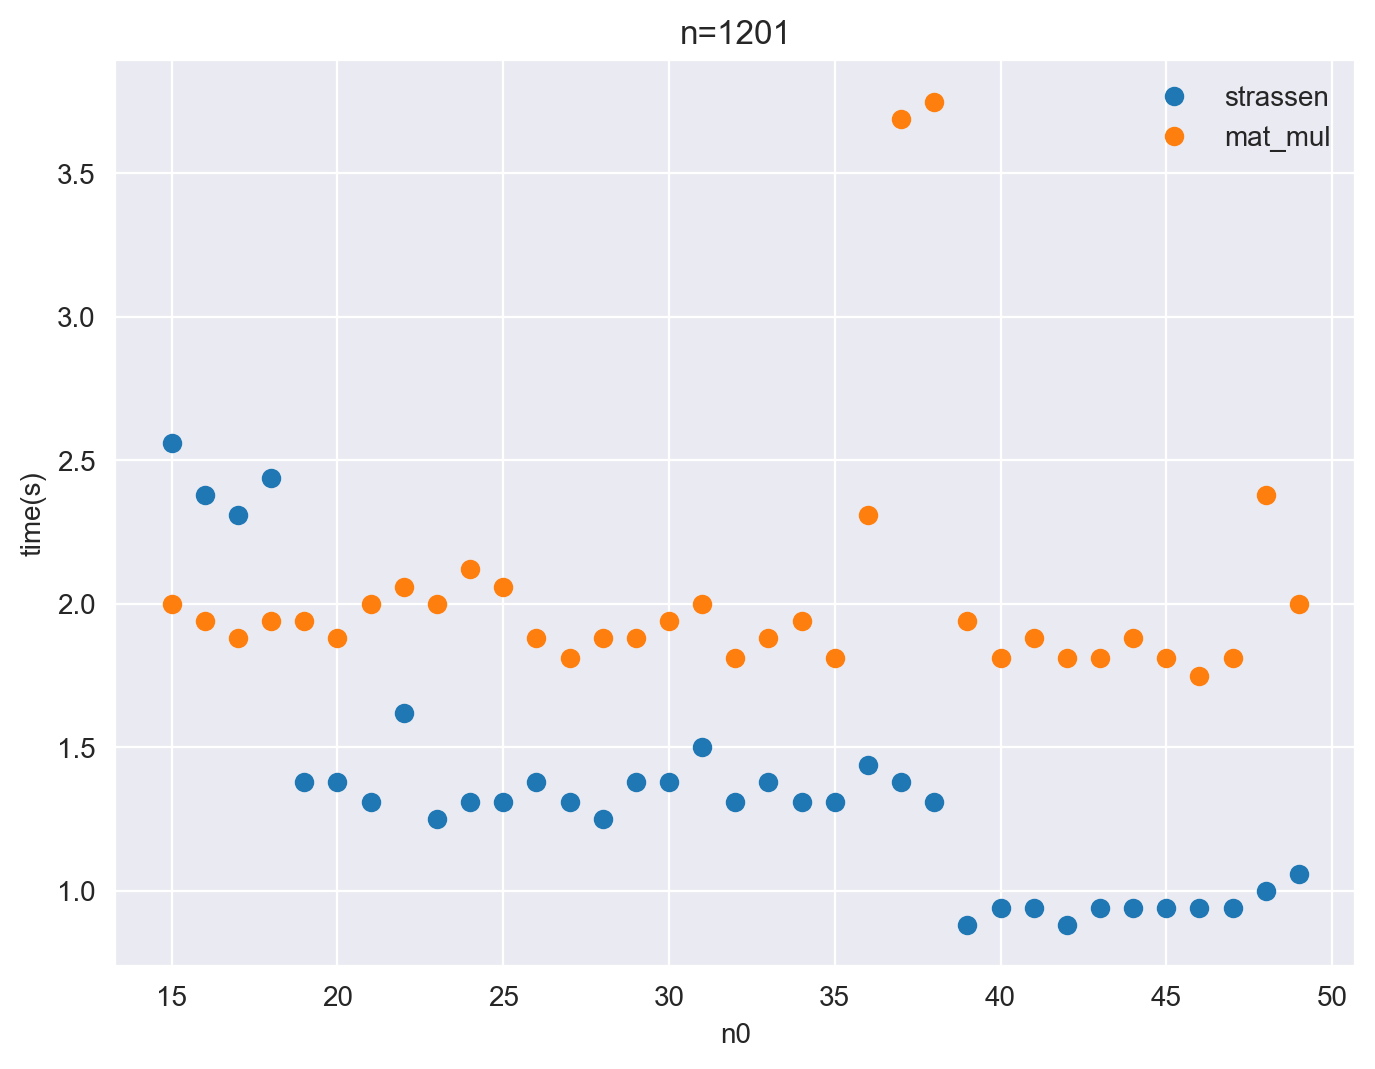

In [107]:
create_plot(n1001,"n=1001",mean=False)
create_plot(n1101,"n=1101",mean=False)
create_plot(n1201,"n=1201",mean=False)

In [111]:
print(n1001[n1001['n0']==26])
print(n1101[n1101['n0']==23])
print(n1201[n1201['n0']==19])

       n  n0  strassen  mat_mul
21  1001  26      1.06     1.06
      n  n0  strassen  mat_mul
8  1101  23      1.25     1.31
      n  n0  strassen  mat_mul
4  1201  19      1.38     1.94


In [112]:
triangle_df = pd.read_csv('c++Code/part3.txt')

In [117]:
grouped_df = triangle_df.groupby('p').mean().reset_index().filter(['p','num_triangle'])
grouped_df['expected']

,p,num_triangle
0,0.01,187.2
1,0.02,1430.0
2,0.03,4702.4
3,0.04,11346.0
4,0.05,22279.2
